# <b> Boundary detection </b>
In this notebook we are going to detect the boundary of filled and unfilled shapes

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [14]:
def generate_input(img_name):
    image = Image.open('images/' + img_name + '.jpg')
    image = ImageOps.grayscale(image)
    data = np.asarray(image)
    
    high = data >= 128
    new_img = np.zeros(shape=data.shape)
    new_img[high] = 255
    new_img[~high] = 0
    
    return new_img, new_img.shape

In [8]:
def exaggerate_plot(imgs):
    '''
    imgs is a list of arrays of len 4:
    imgs[0] - input image array
    imgs[1] - output image array with vertical edges detected
    imgs[2] - output image array with horizontal edges detected
    imgs[3] - output image array with horizontal and vertical edges averaged
    
    '''
    titles = ['Original', 'Vertical edges', 'Horizontal edges', 'Vertical and Horizontal combined']
    fig, axs = plt.subplots(1,4, figsize=(20,20))
    
    for i in range(len(axs)):
        if i == 0:
            axs[i].imshow(imgs[i], cmap='binary')
            axs[i].axis('off')
            axs[i].set(title=titles[i])
            continue
            
        low, high = imgs[i].min(), imgs[i].max()
        range_ = high-low
        iqr = 0.25*range_
        ex1 = imgs[i] < (low+iqr)
        ex2 = imgs[i] > (high-iqr)
        white = np.logical_or(ex1, ex2)
            
        new_img = np.zeros(shape=imgs[i].shape)
        new_img[white] = 0
        new_img[~white] = 255
        axs[i].imshow(new_img, cmap='binary')
        axs[i].axis('off')
        axs[i].set(title=titles[i])
        
    fig.patch.set(facecolor='gray')
    

In [10]:
def plot_boundary_detection(img_name):
    input_img, pix = generate_input(img_name)
    
    #kernels
    vertical_kernel = tf.constant([[1,0,-1],
                                   [1,0,-1],
                                   [1,0,-1]], dtype='float32')

    horizontal_kernel = tf.constant([[1,1,1],
                                     [0,0,0],
                                     [-1,-1,-1]], dtype='float32')
    
    # tensor conversion for convolution
    input_img_tensor = tf.constant(input_img, dtype='float32')

    vertical_output = tf.nn.convolution(input=tf.reshape(input_img_tensor, [1,pix[0],pix[1],1]),
                                        filters=tf.reshape(vertical_kernel, [3,3,1,1]))
    
    horizontal_output = tf.nn.convolution(input=tf.reshape(input_img_tensor, [1,pix[0],pix[1],1]),
                                          filters=tf.reshape(horizontal_kernel, [3,3,1,1]))
    
    #array conversion for plotting
    v_output_img = tf.squeeze(vertical_output).numpy()
    h_output_img = tf.squeeze(horizontal_output).numpy()
    vh_output_img = v_output_img+h_output_img
    vh_output_img = vh_output_img/2
    
    arrs = [input_img, v_output_img, h_output_img, vh_output_img]
    
    exaggerate_plot(arrs)

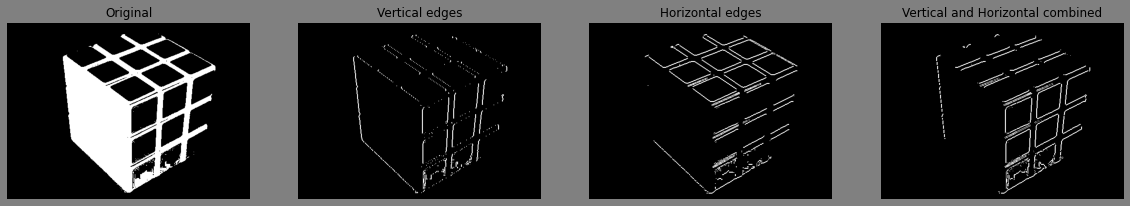

In [16]:
plot_boundary_detection('cube')